In [2]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# import the data 
heart_data = pd.read_csv("/home/student/Documents/AIMS/COOP_tasks/data_science_projects/Heart_Attack_Risk_Assessment/data/updated_version.csv")

## Description of our dataset:

This dataset contains 1,000 patient records generated for health risk assessment. <br>
It includes biometric health indicators commonly used in cardiovascular and general health research. <br>
Each record captures age, cholesterol levels, blood pressure, smoking habits, <br>
diabetes status, and heart attack history—key factors influencing cardiovascular diseases.

On this dataset we are intempt to run:
* Exploratory Data Analysis (EDA)
* Statistical analysis
* Machine learning classification tasks


These are the columns:
* age: Patient's age (years)
* sex: Biological sex (0 = Female, 1 = Male)
* total_cholesterol: Total cholesterol level (mg/dL)
* ldl: Low-Density Lipoprotein (LDL) cholesterol (mg/dL)
* hdl: High-Density Lipoprotein (HDL) cholesterol (mg/dL)
* systolic_bp: Systolic blood pressure (mmHg)
* diastolic_bp: Diastolic blood pressure (mmHg)
* smoking: Smoking status (0 = Non-Smoker, 1 = Smoker)
* diabetes: Diabetes status (0 = No, 1 = Yes)
* heart_attack: History of heart attack (0 = No, 1 = Yes)

📌 Note: This dataset is synthetically generated and does not represent real patients. <br> 
It is meant for research and educational purposes only. 

In [4]:
# look at the shape of our dataset 
print(heart_data.shape)

(1000, 10)


In [5]:
# take a look of some rows in our dataset
heart_data.head(10)

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0
5,39,1,236.033455,153.880809,31.208614,121.857396,79.589069,0,0,0
6,65,0,174.615665,114.029407,55.692586,135.605050,85.529955,0,0,0
7,33,0,242.919402,147.951375,54.439475,123.511557,77.331714,0,0,0
8,49,0,95.804359,83.304875,60.758929,111.697488,77.630529,1,0,0
9,55,0,181.360943,106.011783,50.576747,129.576418,87.588781,0,0,0


## Exploratory Data Analysis (EDA)

In [6]:
# We check for missng and duplicated observations
number_of_missing = heart_data.isnull().sum()
number_of_duplicated = heart_data.duplicated().sum()

print(number_of_missing,"\n ")
print(number_of_duplicated,"duplicated observations")

age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64 
 
0 duplicated observations


In [7]:
# summary of continouos variable in our dataset
continuous_variable = heart_data[["age","total_cholesterol","ldl","hdl","systolic_bp","diastolic_bp"]]
continuous_variable.describe()

,age,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.886000,201.087486,130.047807,49.811244,120.312687,80.231248
std,14.209466,40.042655,30.041659,10.247178,15.507493,10.235917
min,18.000000,84.165932,36.259745,20.600644,74.433950,49.296305
25%,40.000000,174.707208,111.963197,42.622102,110.062952,73.277119
50%,49.000000,201.191547,130.678540,49.682809,120.042175,79.912592
75%,59.000000,226.251708,149.732446,56.703598,130.911804,87.084443
max,94.000000,354.660015,231.376631,82.319810,164.080967,113.848127


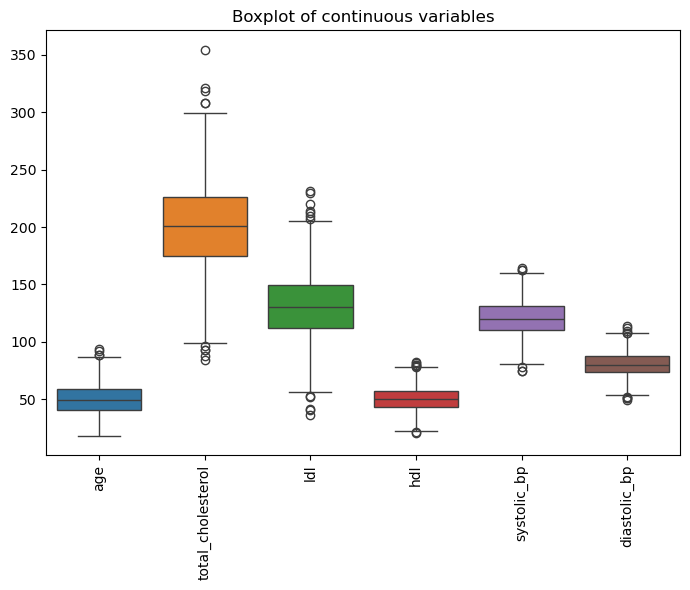

In [8]:
# boxplot of the continuos variables
plt.figure(figsize=(7, 6))
sns.boxplot(data=continuous_variable)

# Set labels and title
plt.title('Boxplot of continuous variables')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

## Insight and interpretation:

Here we can all the box are center arround the mean which suggest us that they all follow a symetric distribution.<br>
they are on each case some extreme values which are far from the oder values we should pay attention to those observations<br>
have a direct effect on the incresing of the risk to get a hearth attack.    

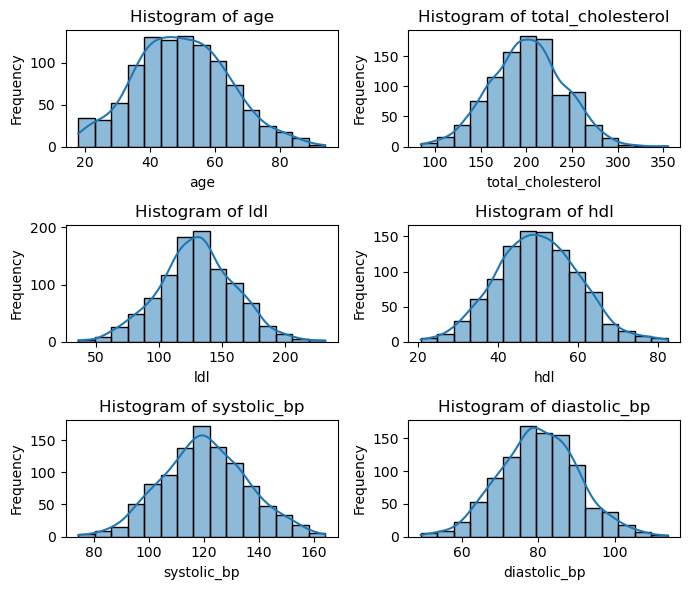

In [9]:
# What about the distribution of the variable in our dataset
# Histogramme of the continuous variables.
plt.figure(figsize=(7, 6))
# Loop through each continuous variable to plot their histogram
for i, col in enumerate(continuous_variable.columns, 1):
    plt.subplot(3, 2, i)  # Adjust the number of rows and columns for subplots
    sns.histplot(continuous_variable[col], bins=15, kde=True)  # Plot histogram with KDE
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

Here we can see that the suggestions give by the box plot are confirmed since oll these variables are following normal distribution.

In [10]:
# Scaling the variable to be able to plot their scater plot
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_variable)
# Convert back to a DataFrame with the same column names
scaled_df = pd.DataFrame(scaled_data, columns=continuous_variable.columns)
scaled_df.describe()

,age,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.025047e-16,-2.842171e-16,-4.316547e-16,6.217249e-17,-7.460699e-17,5.710987e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.245120e+00,-2.921386e+00,-3.123496e+00,-2.852026e+00,-2.959969e+00,-3.023708e+00
25%,-6.960815e-01,-6.591341e-01,-6.022856e-01,-7.019240e-01,-6.612845e-01,-6.797250e-01
50%,-6.238400e-02,2.600065e-03,2.100577e-02,-1.253994e-02,-1.745272e-02,-3.114672e-02
75%,6.417244e-01,6.287499e-01,6.555726e-01,6.729465e-01,6.838256e-01,6.698593e-01
max,3.106104e+00,3.837143e+00,3.374631e+00,3.174028e+00,2.823808e+00,3.285851e+00


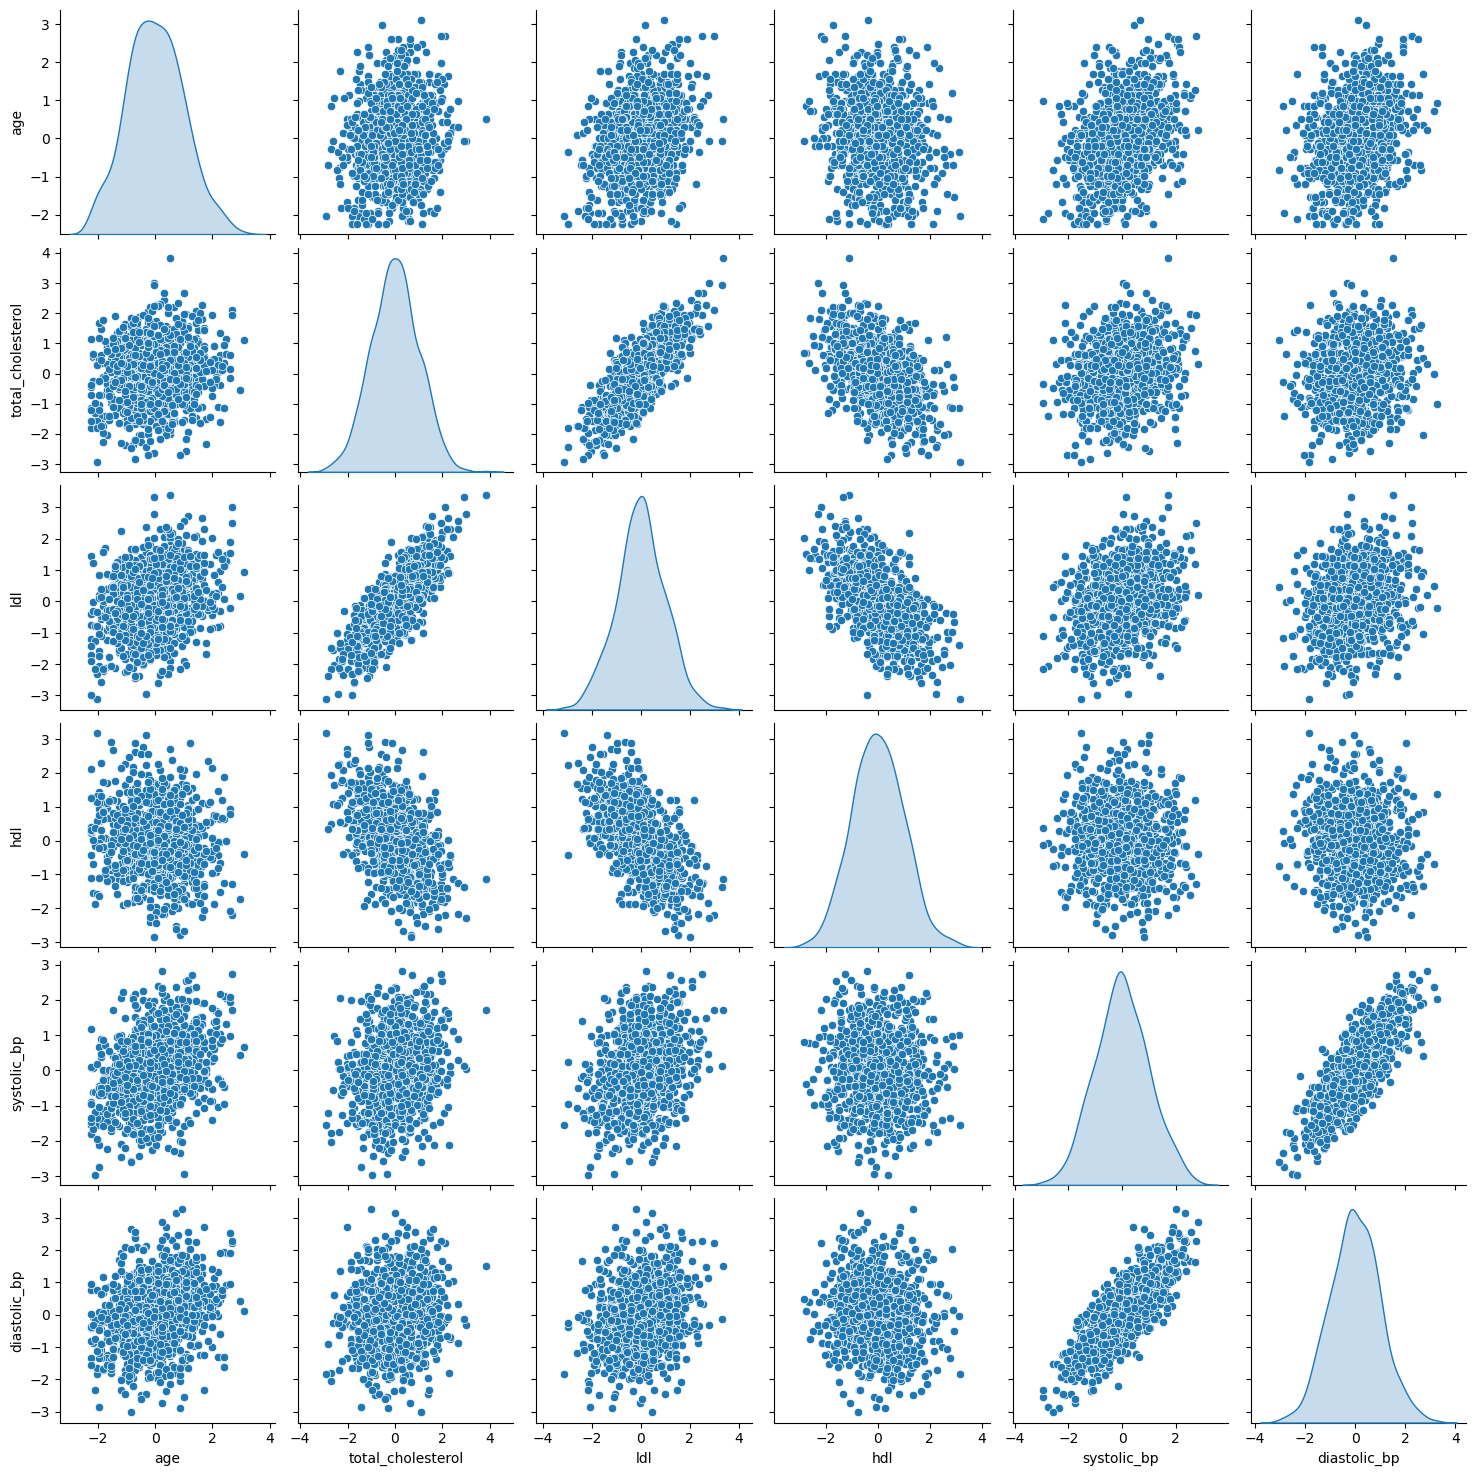

In [11]:
# Scater plot matrix of our variables
# Create a scatter plot matrix
sns.pairplot(scaled_df, diag_kind='kde', markers='o')
# Show the plot
plt.show()


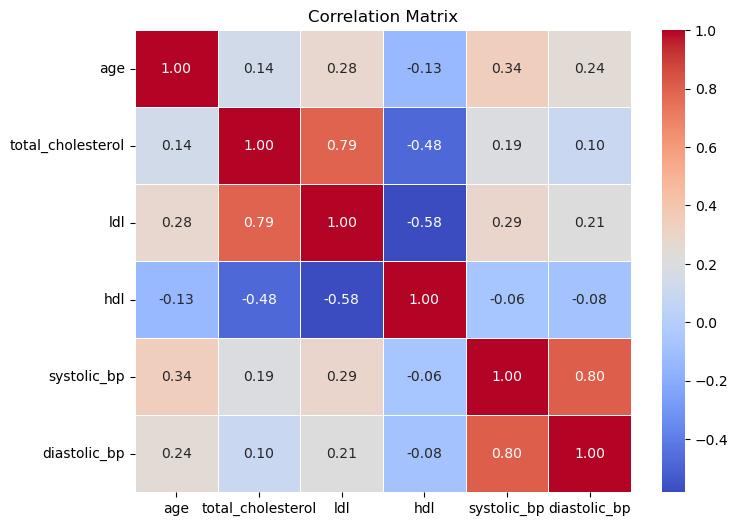

In [12]:
# Correlation matrix of the dataset
# Compute the correlation matrix
correlation_matrix = scaled_df.corr(numeric_only=True)  # Exclude non-numeric columns
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Show the plot
plt.title("Correlation Matrix")
plt.show()

# Statistical analysis

## What is the effect of smoking on heart_attack

In [13]:
# Compare heart attack rates for smokers and non-smokers
summary = heart_data.groupby('smoking')['heart_attack'].mean()
print(summary)

smoking
0    0.071429
1    0.232673
Name: heart_attack, dtype: float64


### Interpretation of our result
Smokers have a heart attack rate that is more than three times higher than non-smokers. <br>
this suggest us there is possibly significant impact between being a smoker and get a heart attack<br>
to confirm this suggestion we are going to run a chi square test for independance between the smoking and heart_attack variables.

In [14]:
import scipy.stats as stats
# Create contingency table
contingency_table = pd.crosstab(heart_data['smoking'], heart_data['heart_attack'])
# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 43.26255952585468, p-value: 4.786553985919395e-11


### Interpretation of our result
 
Since the p-value (4.79e-11) is much smaller than 0.05, we reject the null hypothesis.<br>
This means that there is a statistically significant association between smoking and heart attacks.<br>
In other words, smoking has a meaningful effect on the likelihood of having a heart attack.

In [15]:
import numpy as np
# Chi-Square statistic and sample size
n = len(heart_data)  # Total sample size
k = min(len(heart_data['smoking'].unique()), len(heart_data['heart_attack'].unique()))  # Smallest category count
# Compute Cramér’s V
cramers_v = np.sqrt(chi2 / (n * (k - 1)))
print(f"Cramér’s V: {cramers_v:.4f}")


Cramér’s V: 0.2080


### Interpretation of our cramer's V value 
0.2080 suggests a small-to-moderate association between smoking and heart attacks.<br>
We can say at this time that, while statistically significant,<br>
the association between smoking and heart_attack is not very strong.

In [16]:
# Does the level of cholesterol and the age increase the risk of heart attack ?

X = heart_data[['age', 'total_cholesterol']]  # Independent variables
X = sm.add_constant(X)  # Adds an intercept (constant term)
y = heart_data['heart_attack']  # Dependent variable (1 = heart attack, 0 = no heart attack)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.314030
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           heart_attack   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                 0.05918
Time:                        14:46:42   Log-Likelihood:                -314.03
converged:                       True   LL-Null:                       -333.78
Covariance Type:            nonrobust   LLR p-value:                 2.636e-09
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.2149      0.706     -8.804      0.000      -7.598      -4.831
age     

### Interpretation of ou logistic regression results
1. For the P-Values
    both age and cholesterol P-values respectively(p = 0.005 and p < 0.001) are statistically significant<br> 
    which suggest that an increase either in age or in cholesterol levels increase heart attack risk.<br>
    Intercept (p < 0.001) → Indicates the baseline log-odds when all predictors are zero.

2. After computing the odds ratios:
    age: e0.0208=1.021e0.0208=1.021 → each additional year of age increases the odds of a heart attack by ~ 2.1%.<br>
    cholesterol: $e^{0.0142}=1.014e0.0142=1.014$ → Each unit increase in cholesterol increases the odds of a heart attack by ~ 1.4%.<br>

3. Model Fit & Strength
    Pseudo $R^2$ = 0.059 → which suggests a weak-to-moderate explanatory power.<br>
    The LLR p-value (2.636e-09) indicates that the model as a whole is statistically significant.

### Key insight:
    Both age and cholesterol significantly increase the risk of heart attacks.
    Cholesterol has a slightly stronger effect than age (based on the z-scores and odds ratios).
    The model is statistically significant but doesn't explain all variation, 
    meaning other factors (e.g., smoking,) should be included to improve prediction.

In [17]:
# Does it have more heart attack in a given category of sexe ?
summary = heart_data.groupby('sex')['heart_attack'].mean()
print(summary)

sex
0    0.067653
1    0.136622
Name: heart_attack, dtype: float64


### Interpretation:
Our output indicates the mean heart attack rates for each sex category in the dataset:<br>
    For sex = 0 (likely representing females), the heart attack rate is approximately 0.0677 (or 6.77%).<br>
    For sex = 1 (likely representing males), the heart attack rate is approximately 0.1366 (or 13.66%).<br>

So in this sample, males have a higher heart attack rate than females.

In [18]:
# how change the risk of heart attack with the ldl: Low-Density Lipoprotein, hdl: High-Density Lipoprotein
correlation_ldl = heart_data['ldl'].corr(heart_data['heart_attack'])
correlation_hdl = heart_data['hdl'].corr(heart_data['heart_attack'])

print(f"Correlation between LDL and heart attack: {correlation_ldl}")
print(f"Correlation between HDL and heart attack: {correlation_hdl}")

Correlation between LDL and heart attack: 0.15896458816666045
Correlation between HDL and heart attack: -0.14533819654661279


The correlation results indicate the following:
-  LDL and heart attack: The correlation is 0.159, suggesting a weak positive relationship between LDL and the occurrence of heart attacks.<br>
    This means that as LDL levels increase, the likelihood of a heart attack slightly increases, but the correlation is not very strong.<br>
- HDL and heart attack: The correlation is -0.145, suggesting a weak negative relationship between HDL and heart attacks.<br>
    This implies that as HDL levels increase, the likelihood of a heart attack slightly decreases, but again, the relationship is weak.<br>

These correlations are not very strong, which could suggest that other factors in the dataset might also play a role in determining heart attack risk.

In [19]:
# Assume 'ldl' and 'hdl' are columns in the dataset
X = heart_data[['ldl', 'hdl']]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term to the model
y = heart_data['heart_attack']  # Dependent variable

model = sm.Logit(y, X)  # Logistic regression for binary outcomes
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.318750
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           heart_attack   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                 0.04504
Time:                        14:46:42   Log-Likelihood:                -318.75
converged:                       True   LL-Null:                       -333.78
Covariance Type:            nonrobust   LLR p-value:                 2.956e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5420      1.073     -2.369      0.018      -4.645      -0.439
ldl            0.0125      0.

### interpratation of the coefficient of our model :
:  cholesterol (mg/dL)
* ldl (mg/dL):  
    The coefficient for Low-Density Lipoprotein (LDL) cholesterol is 0.0125 with a p-value of 0.004, which is highly significant (p < 0.05). <br> Suggesting a positive relationship between LDL and heart attack risk LDL, <br> with an increase of the odds of having a heart attack by a factor of $e^{0.0125} ≈ 1.0126$ (i.e., a 1.26%) when the increasing the LDL per mg/dl,

* hdl (mg/dL):
    The coefficient for High-Density Lipoprotein (HDL) cholesterol is -0.0274 with a p-value of 0.034, which is also statistically significant (p < 0.05). <br>This indicates a negative relationship between HDL and heart attack risk <br>with a decrease in the oods of having a heart attack decrease by a factor of $e^{-0.0274}$ ≈ 0.973 (i.e., a 2.7%) for every mg/dl increase in HDL.

### Overall model fit:
* Pseudo R-squared: 0.04504, which is relatively low, indicating that the model explains only a small portion of the variance in heart attack risk.<br> This suggests that there are other important factors not included in the model that affect heart attack risk.
* Log-Likelihood: -318.75, and the LLR p-value is 2.956e-07, which indicates that the model is statistically significant<br> and provides a better fit than the null model (no predictors).

    ### Insights :
    - LDL: Higher levels of LDL increase the risk of a heart attack, <br>supporting the well-known link between high LDL cholesterol and heart disease.
    - HDL: Higher levels of HDL appear to lower the risk of a heart attack, <br>which aligns with the protective role of HDL in cardiovascular health.

## Build classification machine learning models

In [20]:
# we train first a full linear classification model.
# Define the features (independent variables) and target (dependent variable)
X = heart_data[['age', 'sex', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp', 'smoking', 'diabetes']]
y = heart_data['heart_attack']

# Standardize continuous variables for better model performance
scaler = StandardScaler()
X[['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']] = scaler.fit_transform(
    X[['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']]
)

# Add a constant term for statsmodels
X = sm.add_constant(X)


/tmp/ipykernel_88833/3346604855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']] = scaler.fit_transform(


In [28]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2, random_state=42, stratify=y)

In [29]:
# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.224765
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           heart_attack   No. Observations:                  800
Model:                          Logit   Df Residuals:                      790
Method:                           MLE   Df Model:                            9
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                  0.3255
Time:                        14:48:29   Log-Likelihood:                -179.81
converged:                       True   LL-Null:                       -266.60
Covariance Type:            nonrobust   LLR p-value:                 1.113e-32
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1138      0.325    -12.668      0.000      -4.750      -3.477
age     

Observing the coefficients of our model we can see that (Pseudo R² = 0.3255)<br> which means only 32.55% of the variance in heart attack occurrence is explained by the model,<br> (Log-Likelihood (LL) = -179.81 and LL-Null = -266.60)<br> to indicate that the model performs significantly better than a null model.<br>
LLR p-value = 1.113e-32 : This suggests the overall model is highly significant.<br> The significant Predictors (p < 0.05) are: 
- Age (p = 0.002, coef = 0.4928): Older individuals have a higher risk of heart attack.
- Total cholesterol (p = 0.033, coef = 0.5150): Higher cholesterol levels increase risk.
- HDL (p = 0.009, coef = -0.4632): Higher HDL (good cholesterol) is protective against heart attacks.
- Smoking (p < 0.001, coef = 2.0254): Smokers have a much higher risk of heart attacks.
- Diabetes (p < 0.001, coef = 2.7905): Having diabetes is strongly associated with heart attack risk.

Possible Next Steps:

    Interpret Odds Ratios: Convert coefficients into odds ratios (ecoefecoef) for better interpretability.
    Check for Multicollinearity: LDL and total cholesterol might be correlated, which could affect significance.
    Consider Interaction Terms: For example, does smoking amplify the effect of high cholesterol or diabetes?
    Assess Model Calibration: Use ROC curves or confusion matrices to evaluate predictive power.



In [30]:
# variance analysis.


In [22]:
# we perfom feature importance to see if we can build small model which perform better


In [23]:
# build a model with the important features


In [24]:
# interpratation of it's coefficient and variance analysis


In [25]:
# select feature by step-wise selection and see if the selected features will be the same selected when we where runing the feature importance


In [26]:
# we build different models using differents algorithm 


In [27]:
# we compare the different obtained models

